In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})


In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [6]:
clf = clf.fit(X, y)

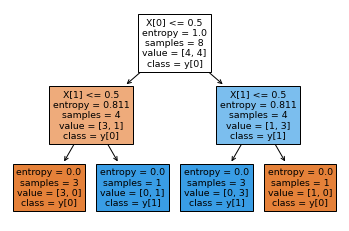

In [10]:
plt.figure()
tree.plot_tree(clf, filled=True, class_names=True);

In [12]:
cats = pd.read_csv('cats.csv', index_col=0)
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [39]:
clfb = tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
X = cats.iloc[:, 0:3]
y = cats.iloc[:, 3]

In [23]:
X.columns

Index(['Шерстист', 'Гавкает', 'Лазает по деревьям'], dtype='object')

In [30]:
y.to_dict()

{0: 'собачка',
 1: 'собачка',
 2: 'собачка',
 3: 'собачка',
 4: 'котик',
 5: 'котик',
 6: 'котик',
 7: 'котик',
 8: 'котик',
 9: 'котик'}

In [41]:
clf = clfb.fit(X.iloc[:, [0]], y)

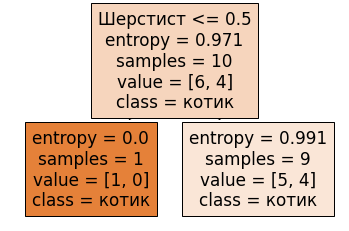

In [42]:
fig1 = plt.figure()
tree.plot_tree(clf, 
               filled=True, 
               feature_names=X.columns, 
               class_names={1: 'собачка', 0: 'котик'});

In [36]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [68]:
def entropy(n1, n2):
    if not n1 or not n2:
        return 0
    p1 = n1/(n1+n2)
    p2 = n2/(n1+n2)
    return - p1*np.log2(p1) - p2*np.log2(p2)

In [69]:
def igain(E0, n1, n2, n3, n4):
    N = n1 + n2 + n3 + n4
    E1 = entropy(n1, n2)
    E2 = entropy(n3, n4)
    return E0 - E1*(n1+n2)/N - E2*(n3+n4)/N

In [70]:
E0 = entropy(4, 6)
E0

0.9709505944546686

Шертист < 0.5
да - соб: 0, кот: 1 entropy = - 0 log 0 - 1 log 1 = 0 
нет- соб: 4, кот: 5 entropy = -4/9 log4/9 -5/9 log 5/9 = 0.991

In [72]:
igain(E0, 0, 1, 4, 5)

0.07898214060026854

Лазает < 0.5
да - соб: 4, кот: 0 entropy = - 1 log 1 - 0 log 0 = 0 
нет- соб: 0, кот: 6 entropy = -0 log0 - 1 log 1 = 0

In [76]:
igain(E0, 4, 0, 0, 6)

0.9709505944546686

Гавкает < 0.5
да - соб: 0, кот: 5 entropy = - 0 log 0 - 1 log 1 = 0 
нет- соб: 4, кот: 1 entropy = -4/5 log4/5 -1/5 log 1/5 = 0.722

In [78]:
igain(E0, 0, 5, 4, 1)

0.6099865470109874